# Análisis de tiendas - Cadena Alura Store



## Introducción

El objetivo de este análisis, es ayudar al Sr. Juan a decidir que tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para el estudio contamos con datos de las 4 tiendas que posee el Sr. Juan. A continuación, empezaremos el análisis.

## Importación de datos

Para comenzar nuestro análisis, primero vamos a importar los datos de las 4 tiendas. Estas, están en formato .csv

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Como podemos observar, contamos con los siguientes datos:
- Producto: son los productos que vende el Sr. Juan en cada tienda. Es del tipo categórico.
- Categoría del Producto: agrupa por categoría a los productos. Es del tipo categórico.
- Precio: precios de cada producto. Es del tipo numérico.
- Costo de envío: es el costo de llevar cada producto hasta el domicilio de cada cliente. Es del tipo numérico.
- Fecha de compra: fechas en las que se compró cierto producto. Es del tipo date.
- Vendedor: es el empleado que vendió cierto producto. Es del tipo categórico.
- Lugar de compra: ciudad donde se compró cierto producto. Es del tipo categórico.
- Calificación: valor numérico que representa la satisfacción del cliente. Es del tipo numérico.
- Método de pago: representa al medio de pago por el que se adquirió cierto producto. Es del tipo categórico.
- Cantidad de cuotas: valor numérico que representa a las cuotas en las que fue adquirida cierto producto. Es del tipo numérico.
- lat y long: ubicación de donde se compró cierto producto.

A continuación, comenzaremos con el análisis de las 4 tiendas.

## Desarrollo

## 1. Análisis de facturación

Para comenzar nuestro análisis, comenzaremos calculando la facturación de cada tienda. Para esto, se procedió a sumar el precio total de cada tienda, ya que no contabamos con datos de las cantidades vendidas.


In [ ]:
ingresos_tienda1 = tienda["Precio"].sum()
ingresos_tienda2 = tienda2["Precio"].sum()
ingresos_tienda3 = tienda3["Precio"].sum()
ingresos_tienda4 = tienda4["Precio"].sum()

def ingreso_tienda():
  return [ingresos_tienda1, ingresos_tienda2, ingresos_tienda3, ingresos_tienda4]

print("Ingresos de la tienda N1: ", ingresos_tienda1)
print("Ingresos de la tienda N2: ", ingresos_tienda2)
print("Ingresos de la tienda N3: ", ingresos_tienda3)
print("Ingresos de la tienda N4: ", ingresos_tienda4)

Ingresos de la tienda N1:  1150880400.0
Ingresos de la tienda N2:  1116343500.0
Ingresos de la tienda N3:  1098019600.0
Ingresos de la tienda N4:  1038375700.0


Podemos observar que la tienda número 1 es la que más factura de las 4, siendo la tienda número 4 la que menos facturación tiene.

## 2. Ventas por categoría

Ahora vamos a proceder con el cálculo de ventas por cada categoría de producto en cada tienda. Para analizar esto, vamos a tener en cuenta las ventas máximas por cada categoría en cada tienda, los que nos dará un panorama de que categorías son las más vendidas en cada tienda.

In [ ]:
ventas_tienda1 = tienda.groupby("Categoría del Producto")["Precio"].sum().reset_index()
ventas_tienda2 = tienda2.groupby("Categoría del Producto")["Precio"].sum().reset_index()
ventas_tienda3 = tienda3.groupby("Categoría del Producto")["Precio"].sum().reset_index()
ventas_tienda4 = tienda4.groupby("Categoría del Producto")["Precio"].sum().reset_index()

tiendas = {
    "Tienda 1": ventas_tienda1,
    "Tienda 2": ventas_tienda2,
    "Tienda 3": ventas_tienda3,
    "Tienda 4": ventas_tienda4
}

for nombre, df in tiendas.items():
    mas_popular = df.loc[df["Precio"].idxmax()]
    print(f"\nProducto más popular en la {nombre}:")
    print(f"- Categoría: {mas_popular['Categoría del Producto']}")
    print(f"- Ventas: {mas_popular['Precio']}")


Producto más popular en la Tienda 1:
- Categoría: Electrónicos
- Ventas: 429493500.0

Producto más popular en la Tienda 2:
- Categoría: Electrónicos
- Ventas: 410831100.0

Producto más popular en la Tienda 3:
- Categoría: Electrónicos
- Ventas: 410775800.0

Producto más popular en la Tienda 4:
- Categoría: Electrónicos
- Ventas: 409476100.0


En las 4 tiendas, las categorías más vendidas fueron Electrónicos, siendo la tienda 1 la que más ventas generó, con la tienda 4 siendo la que menos vendió.

## 3. Calificación promedio de la tienda

El calculo siguiente, representa a la calificación promedio de cada tienda, puesta por los clientes. Esto nos da una perspectiva de la experiencia de los usuarios a la hora de comprar.

In [ ]:
promedio_tienda1 = tienda["Calificación"].mean()
promedio_tienda2 = tienda2["Calificación"].mean()
promedio_tienda3 = tienda3["Calificación"].mean()
promedio_tienda4 = tienda4["Calificación"].mean()

print("Valoración media de la tienda N1: ", round(promedio_tienda1, 3))
print("Valoración media de la tienda N2: ", round(promedio_tienda2, 3))
print("Valoración media de la tienda N3: ", round(promedio_tienda3, 3))
print("Valoración media de la tienda N4: ", round(promedio_tienda4, 3))

Valoración media de la tienda N1:  3.977
Valoración media de la tienda N2:  4.037
Valoración media de la tienda N3:  4.048
Valoración media de la tienda N4:  3.996


Si bien la variación no es tan significativa, se puede observar que, aún siendo la tienda número 1 la que más vendió y facturó, es la que peor calificación promedio posee, siendo la tienda número 3 la que mejor calificación promedio posee.

## 4. Productos más y menos vendidos

Otro punto importante a tener en cuenta para el análisis, son los productos que más y menos se vendieron en cada tienda, a continuación se muestran esos productos.

In [ ]:
productost1 = tienda["Producto"].value_counts().reset_index()
productost2 = tienda2["Producto"].value_counts().reset_index()
productost3 = tienda3["Producto"].value_counts().reset_index()
productost4 = tienda4["Producto"].value_counts().reset_index()


productos = {
    "Tienda 1": productost1,
    "Tienda 2": productost2,
    "Tienda 3": productost3,
    "Tienda 4": productost4
}
productos_mas_vendidos = []
cantidades_mas_vendidas = []

for nombre, df in productos.items():
    mas_vendido = df.loc[df["count"].idxmax()]
    menos_vendido = df.loc[df["count"].idxmin()]
    print(f"\n{nombre}:")
    print(f"- Producto más vendido: {mas_vendido['Producto']} - {mas_vendido['count']} unidades")
    print(f"- Producto menos vendido: {menos_vendido['Producto']} - {menos_vendido['count']} unidades")
    productos_mas_vendidos.append(mas_vendido['Producto'])
    cantidades_mas_vendidas.append(mas_vendido['count'])


Tienda 1:
- Producto más vendido: Microondas - 60 unidades
- Producto menos vendido: Auriculares con micrófono - 33 unidades

Tienda 2:
- Producto más vendido: Iniciando en programación - 65 unidades
- Producto menos vendido: Juego de mesa - 32 unidades

Tienda 3:
- Producto más vendido: Kit de bancas - 57 unidades
- Producto menos vendido: Bloques de construcción - 35 unidades

Tienda 4:
- Producto más vendido: Cama box - 62 unidades
- Producto menos vendido: Guitarra eléctrica - 33 unidades


## 5. Envío promedio por tienda

Por último, también se calculó el costo de envío promedio de cada tienda. Esto es importante ya que influye en los ingresos de cada tienda.

In [ ]:
promedio_envio_tienda1 = tienda["Costo de envío"].mean()
promedio_envio_tienda2 = tienda2["Costo de envío"].mean()
promedio_envio_tienda3 = tienda3["Costo de envío"].mean()
promedio_envio_tienda4 = tienda4["Costo de envío"].mean()

def promedio_envio_tienda():
  return [promedio_envio_tienda1, promedio_envio_tienda2, promedio_envio_tienda3, promedio_envio_tienda4]

print("Valor del envío promedio de la tienda N1: ", round(promedio_envio_tienda1, 3))
print("Valor del envío promedio de la tienda N2: ", round(promedio_envio_tienda2, 3))
print("Valor del envío promedio de la tienda N3: ", round(promedio_envio_tienda3, 3))
print("Valor del envío promedio de la tienda N4: ", round(promedio_envio_tienda4, 3))

Valor del envío promedio de la tienda N1:  26018.61
Valor del envío promedio de la tienda N2:  25216.236
Valor del envío promedio de la tienda N3:  24805.68
Valor del envío promedio de la tienda N4:  23459.457


Podemos observar que la que mayor costo de envío promedio posee es la tienda número 1, mientras que la tienda número 4 es la que menor costo de envío promedio posee.

## 6. Visualizaciones

A continuación, se muestran gráficos para poder visualizar mejor algunos puntos calculados anteriormente.

## 6.1 Ingresos por tienda

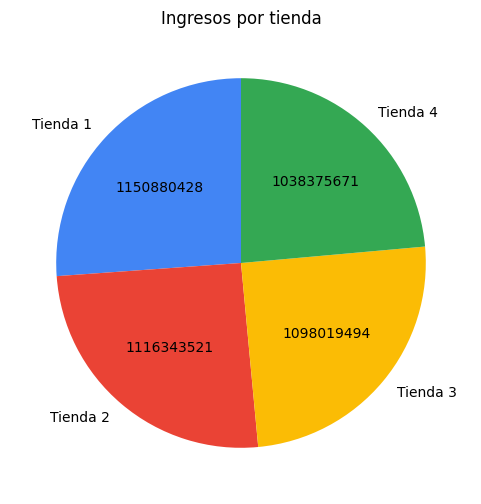

In [ ]:
import matplotlib.pyplot as plt

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos = ingreso_tienda()
colores = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(ingresos, labels=tiendas, autopct=lambda pct: f'{int(pct*sum(ingresos)/100):d}', colors=colores, startangle=90)
ax.set_title('Ingresos por tienda')
plt.show()

## 6.2 Productos más vendidos

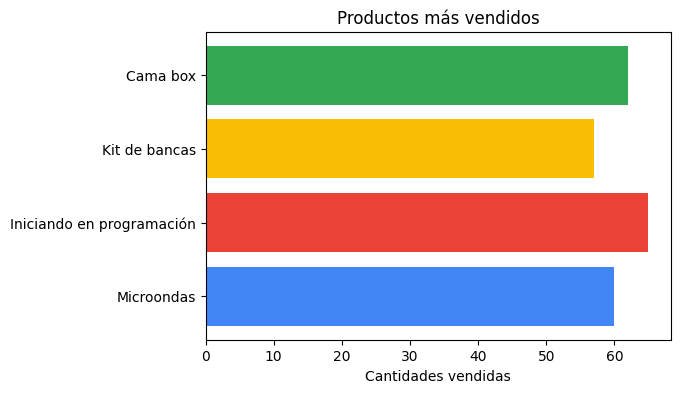

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.barh(productos_mas_vendidos, cantidades_mas_vendidas, color=colores)
ax.set_xlabel('Cantidades vendidas')
ax.set_title('Productos más vendidos')
plt.show()

## 6.3 Costos de envío promedio

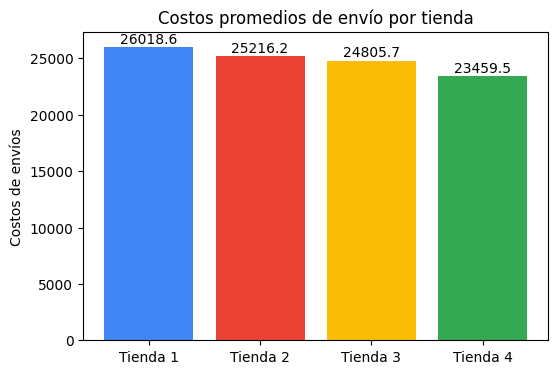

In [ ]:
promedios_envios = promedio_envio_tienda()

fig, ax = plt.subplots(figsize=(6, 4))
barras_grafico = ax.bar(tiendas, promedios_envios, color=colores)
ax.bar_label(barras_grafico, padding = 0.5, fontsize = 10)
ax.set_ylabel('Costos de envíos')
ax.set_title('Costos promedios de envío por tienda')
plt.show()


## Conclusión

Para cerrar este análisis, vamos a hacer un resumen del mismo. Se analizaron las 4 tiendas de Alura Store, con sus facturaciones, ventas por categoría, calificaciones promedios de cada una, productos más y menos vendidos en cada una y por último sus costos de envío promedio.
La tienda número 1 es la que más facturó y ventas tuvo, mientras que la tienda número 4 es la que menos facturó y menos ventas tuvo. Las tiendas número 2 y 3, se encuentran en el medio de estas dos tiendas (1 y 4).
Por otro lado, en cuanto a las calificaciones promedio de cada una, si bien no hubo mucha variación, las tiendas 2 y 3 son las que mejor calificación alcanzaron.
Por último, el costo de envío promedio de la tienda número 1 es el más alto, mientras que el de la tienda número 4 es el más bajo.

Se concluye que el Sr. Juan debe vender la **tienda número 4** para poder iniciar un nuevo emprendimiento, ya que es la que menos facturó y menos ventas tuvo. Por otra parte, se le recomienda poner foco a la **tienda número 1** ya que, si bien es la que más facturó y más ventas tuvo, es la que menor calificación promedio tuvo, dándonos una perspectiva de que hay que poner foco en la atención al cliente, para mejorar la experiencia del usuario y que esto no afecte, a futuro, a las ventas.